In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('realtor-data.csv')

# Display the first few rows of the dataframe
print(data.head())

# Display summary statistics of the dataset
print(data.describe())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  
         brokered_by         price           bed          bath       acre_lot  \
count   39147.000000  3.915400e+04  28962.000000  29030.000000   33289.000000   
mean    52042.166705 

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Separate numerical and categorical columns
numerical_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
categorical_cols = ['brokered_by', 'status', 'street', 'city', 'state', 'zip_code', 'prev_sold_date']

# Impute missing values for numerical columns with the mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns with the mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify that there are no missing values left
print(data.isnull().sum())


brokered_by           7
status                0
price                 0
bed               10192
bath              10124
acre_lot           5865
street               95
city                 16
state                 1
zip_code             29
house_size         9918
prev_sold_date    25749
dtype: int64
brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select relevant features
features = ['house_size', 'bed', 'bath']
target = 'price'  # Target variable

# Define features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# Display the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Root Mean Squared Error: 3699926.2588276626
Coefficients: [   222.71759231 -94632.03875181 214945.35282411]
Intercept: -99064.03123793018


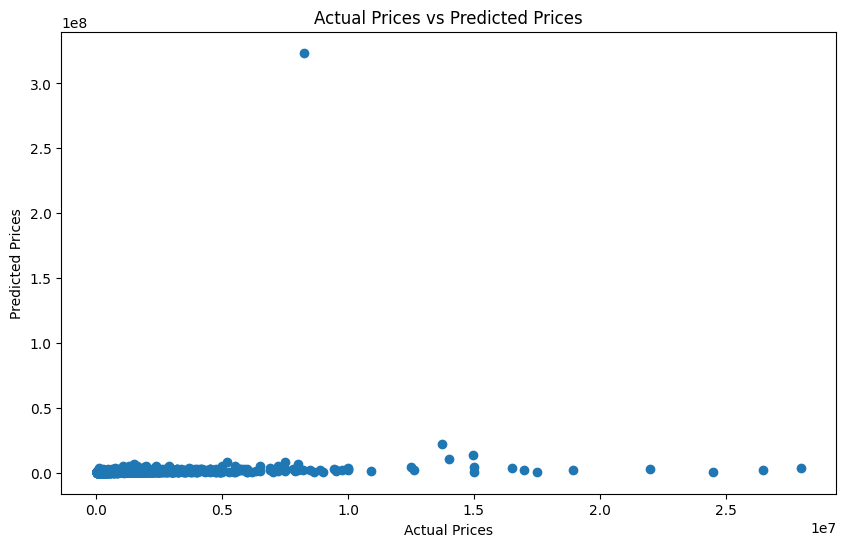

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


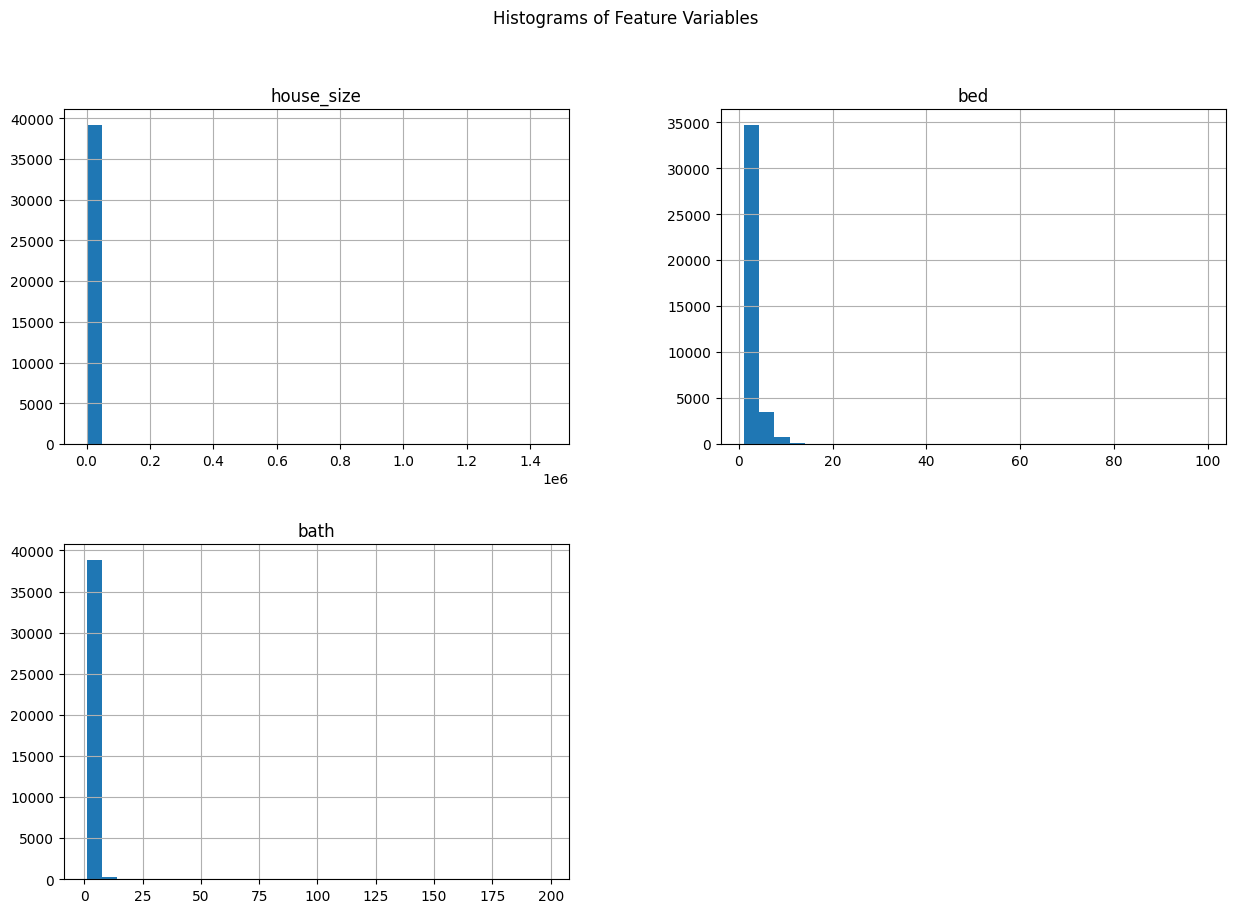

In [ ]:
data[features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Feature Variables")
plt.show()


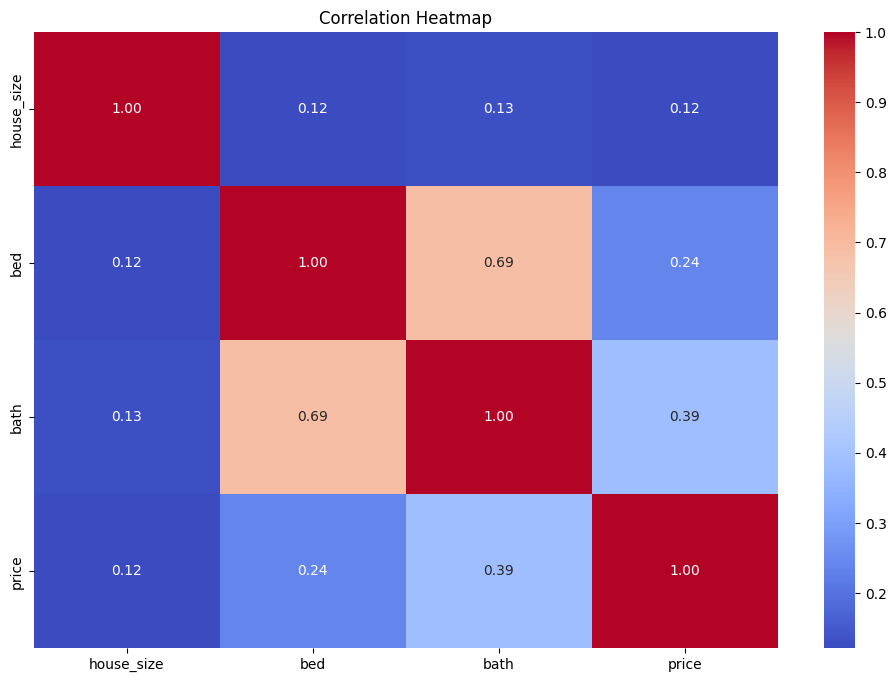

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
corr_matrix = data[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


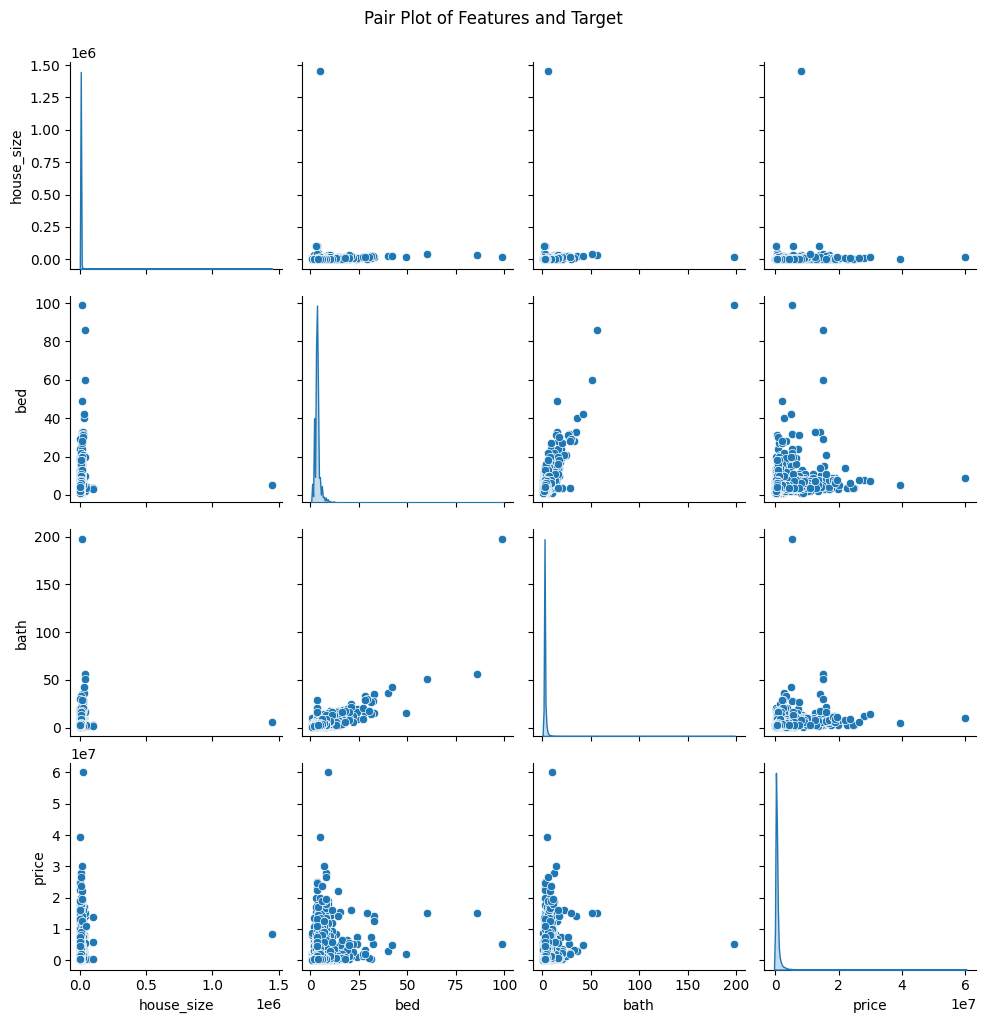

In [ ]:
sns.pairplot(data[features + [target]], diag_kind='kde')
plt.suptitle("Pair Plot of Features and Target", y=1.02)
plt.show()
